<h1>Assignment No 2</h6>

<h3>Import Libraries:</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


<h3>Load Data:</h3>

In [2]:
file_path = './CSV files/goldstock.csv'
data = pd.read_csv(file_path)

<h3>Explore Data:</h3>

In [3]:
print(data.head())
print("............................................................")
print("............................................................")

print(data.describe())

   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
............................................................
............................................................
        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
50%    1259.00

<h3>Explore and Preprocess Data</h3>

In [4]:
print("Original Data:")
print(data.head())
data = data.drop(columns=['Unnamed: 0'])
print("\nMissing Values:")
print(data.isnull().sum())
data['Date'] = pd.to_datetime(data['Date'])
data['DayofWeek'] = data['Date'].dt.dayofweek


Original Data:
   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

Missing Values:
Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


<h3>Split Data into Features and Target Variable</h3>

<h4>Split the data into training and testing sets.</h4>

In [5]:
X = data[['Volume', 'Open', 'High', 'Low', 'DayofWeek']]
y = data['Close']



<h3>Split Data into Training and Testing Sets:</h3>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h3>Build and Train Linear Regression Model</h3>

<h4>Build and Train Linear Regression Model</h4>

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h3>Make Predictions on Test Set</h3>

In [10]:
y_pred = model.predict(X_test)

<h3>Evaluate the Model</h3>

In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")


NameError: name 'mean_squared_error' is not defined

Visualize Predicted vs. Actual Values

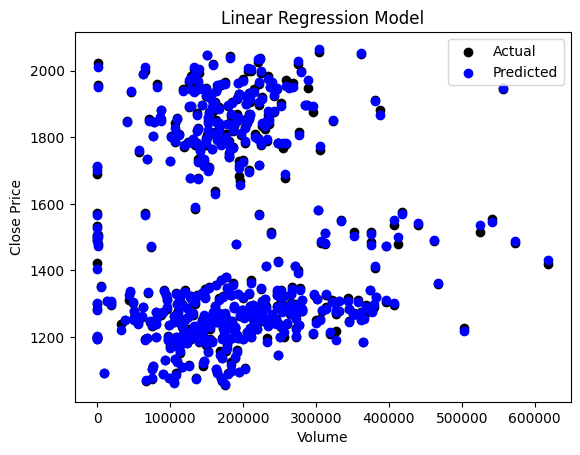

In [12]:
plt.scatter(X_test['Volume'], y_test, color='black', label='Actual')
plt.scatter(X_test['Volume'], y_pred, color='blue', label='Predicted')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend()
plt.title('Linear Regression Model')
plt.show()
